# Homework 2

## Question 1 Plot some objective functions 

In [140]:
##Generating random matrix with random values for x = [x1,x2]
xrandom1<- matrix(unique(runif(100,-2,2)),ncol=2)
xrandom1[,1] <- sort(xrandom1[,1],decreasing = FALSE)
xrandom1[,2] <- sort(xrandom1[,2],decreasing = FALSE)
xr1 = rep(xrandom1[,1],length(xrandom1[,1]))
xr2 = c()
for(i in xrandom1[,2]){
list = rep(i,length(xrandom1[,2]))
xr2 = append(xr2,list)
}
xrandom = cbind(xr1,xr2)

##Function to plot data

plotfunction <- function(x,y,z,name,theta = 40){
    persp(x,y,z, theta = theta,main = name, 
      xlab = "x1", ylab = "x2",zlab = "f(x)" ,  
      col="red", border="grey100", ticktype = "detailed" )
}

1) $f(x) = (1 - x_{1}x_{2})^2 $
<p>&nbsp;</p>

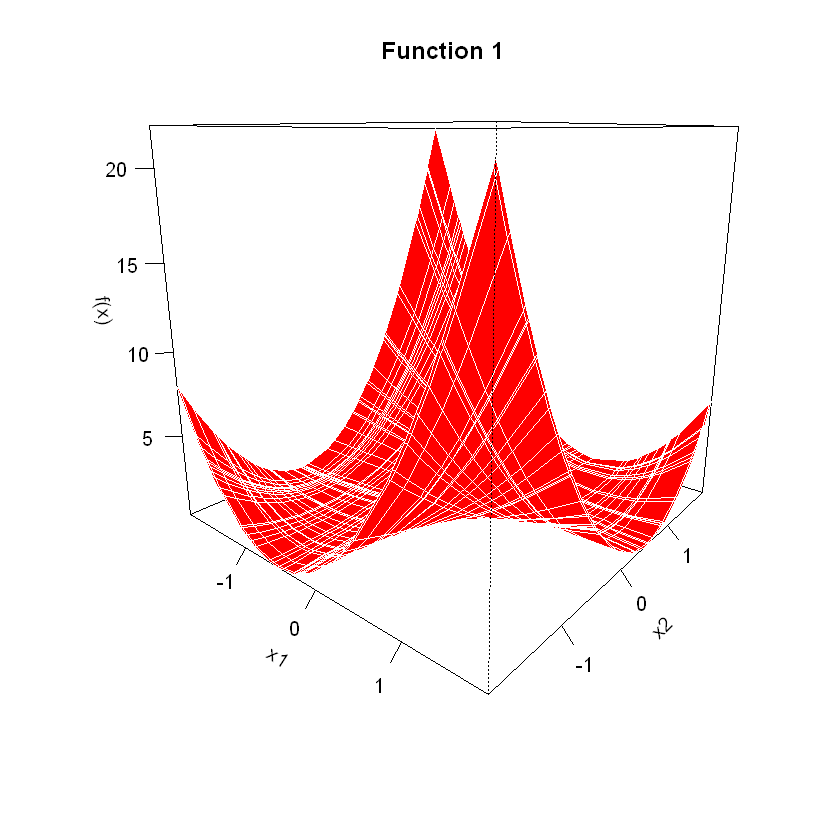

In [141]:
funct1 <- function(x){
    return ((1 - x[1]*x[2])^2)
}
fx <- matrix(apply(xrandom,1,funct1),nrow = length(xrandom1[,1]),ncol = length(xrandom1[,2]))
plotfunction(xrandom1[,1],xrandom1[,2],fx,"Function 1")

#### This function in not convex as there are multiple distinct minima
<p>&nbsp;</p>

2) $f(x) = log(1 + exp(-w^T x)) \enspace  \text{where} \enspace   w \in \mathbb{R}^2$

value for W [ 1.94484 -0.06419089 ]

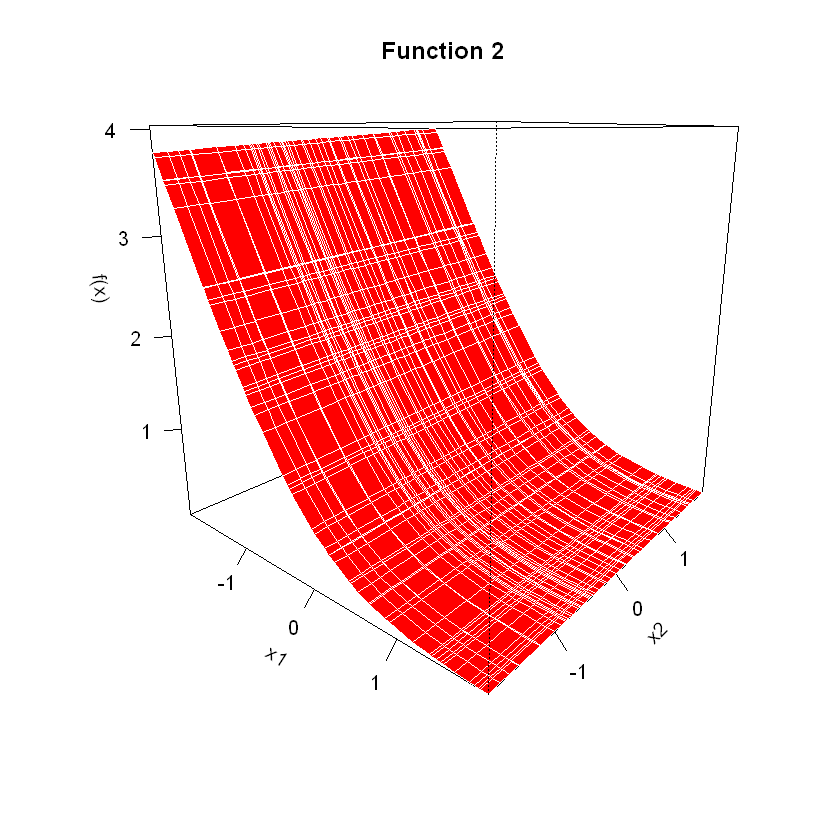

In [37]:
w<- matrix(unique(runif(2,-2,2)),ncol=2)
cat("value for W [",w,"]")
funct2 <- function(x){
    #converting x into row matrix
    x <- matrix(x,ncol=2,byrow = TRUE)
    return (log(1 + exp(-(x%*%t(w)))))
}
fx <- matrix(apply(xrandom,1,funct2),nrow = length(xrandom1[,1]),ncol = length(xrandom1[,2]))
plotfunction(xrandom1[,1],xrandom1[,2],fx,"Function 2")

#### This function in convex, but it is not strongly convex
<p>&nbsp;</p>

3) $f(x) = max(a_{2}max(a_{1}x_{1},b_{1}),b_{2})$ where $ a_{1}, a_{2}, b_{1}, b_{2} $ are real scalars

value for a1,a2,b1,b2 [ 5 4 3 1 ]

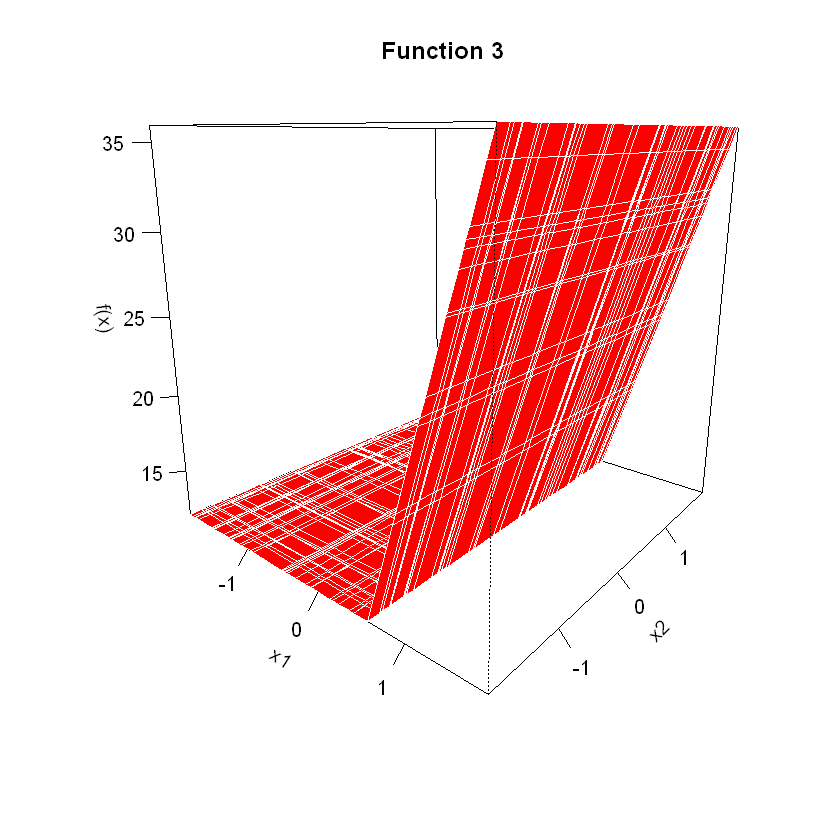

In [14]:
#scalars a1,a2,b1,b2
s<- matrix(sample(seq(1,5),4,replace = FALSE),ncol=4)
cat("value for a1,a2,b1,b2 [",s,"]")

funct3 <- function(x){
    #converting x into row matrix
    x <- matrix(x,ncol=2,byrow = TRUE)
    return (max(s[2]*(max(s[1]*x[1],s[3])),s[4]))
}
#if majority of fx values are same function may give error just rerrun the function
fx <- matrix(apply(xrandom,1,funct3),nrow = length(xrandom1[,1]),ncol = length(xrandom1[,2]))
plotfunction(xrandom1[,1],xrandom1[,2],fx,"Function 3")

#### This function in convex, but it is not strongly convex

4) $f(x) =  \lVert Ax -b \rVert^2 + \lambda L_{\delta}(x) $ where $\lambda > 0, \delta > 0$ and $  L_{\delta}(x) = \begin{cases}
  \frac{1}{2}\lVert x \rVert^2 & \text{for }\lVert x \rVert \leq \delta\\    
  \delta(\lVert x \rVert - \frac{1}{2}\delta), & \text{otherwise.}    
\end{cases}$

A =  1.130383 0.3376974 0.01868903 1.722128  b =  1.339688 0.5110653  delta =  7.541152  lambda =  7.598412

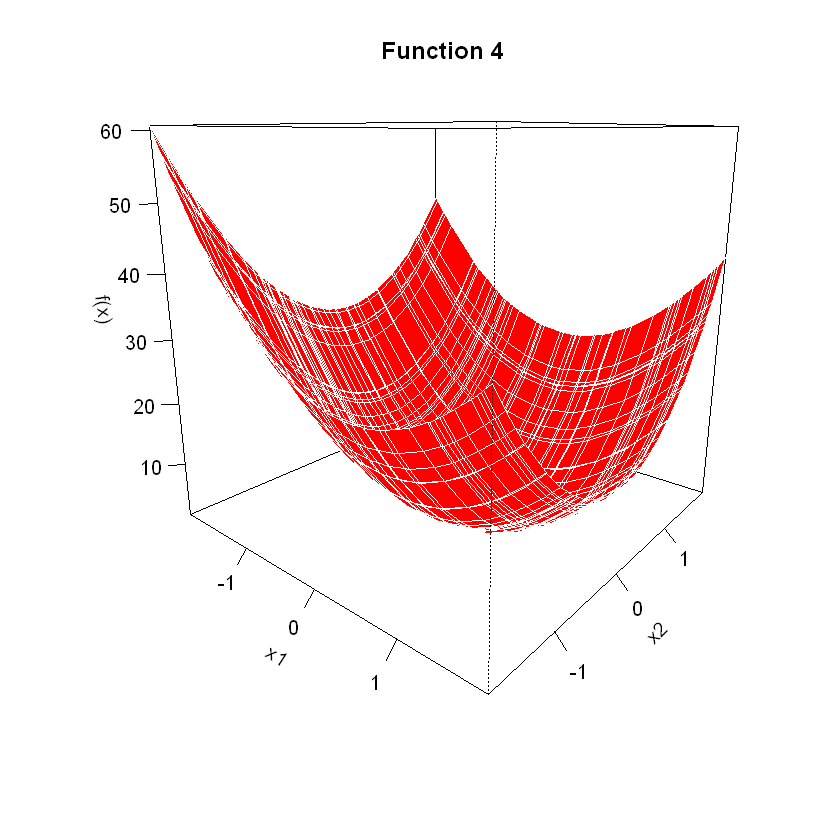

In [43]:
Ldelta  <- function(x,delta){
    if(norm(x, type = "2") <= delta)
        {
        return ((norm(x,type = "2")**2)/2)
    }
    return (delta * (norm(x,type = "2") - delta/2))    
}

funct4 <- function(x,A,b,delta,lambda){
    #To statisfy Ax - b
    x = matrix(x,ncol=1)
    return ((norm(((A%*%x) - b), type = "2")**2) + lambda*Ldelta(x,delta))
}

#square matrix 2x2
A = matrix(unique(runif(4,-2,2)),ncol=2)
#column matrix matrix 2x1
b = matrix(unique(runif(2,-2,2)),ncol=1)
delta = runif(1,0,10)
lambda = runif(1,0,10)
cat("A = ",A," b = ",b," delta = ",delta," lambda = ",lambda)
fx <- matrix(apply(xrandom,1,funct4,A = A,b = b,delta = delta,lambda = lambda),nrow = length(xrandom1[,1]),ncol = length(xrandom1[,2]))
plotfunction(xrandom1[,1],xrandom1[,2],fx,"Function 4",40)

#### This function in strongly convex
<p>&nbsp;</p>

5) $f(x) = x_{1}log(x_{1}) + x_{2}log(x_{2})   \enspace \text{for} \enspace x_{1} > 0 \enspace\text{and}\enspace x_{2} > 0  $

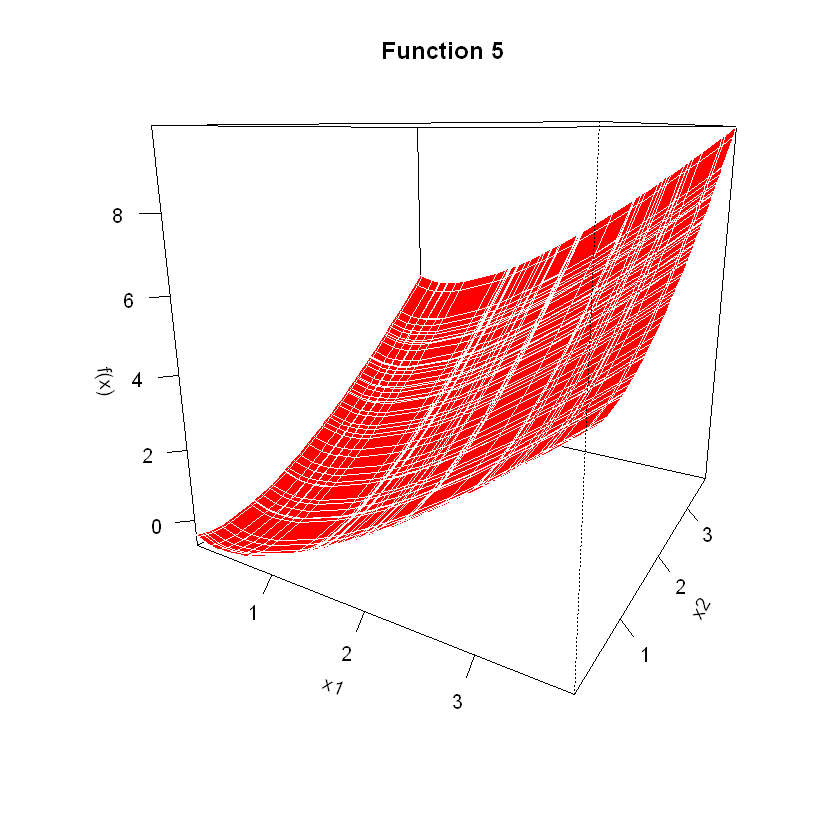

In [50]:
##Generating random matrix with random values for x = [x1,x2]
xrandom1<- matrix(unique(runif(100,0,4)),ncol=2)
xrandom1[,1] <- sort(xrandom1[,1],decreasing = FALSE)
xrandom1[,2] <- sort(xrandom1[,2],decreasing = FALSE)
xr1 = rep(xrandom1[,1],length(xrandom1[,1]))
xr2 = c()
for(i in xrandom1[,2]){
list = rep(i,length(xrandom1[,2]))
xr2 = append(xr2,list)
}
xrandom = cbind(xr1,xr2)

funct5 <- function(x){
    return ((x[1]*log(x[1])) + (x[2]*log(x[2])) )
}
fx <- matrix(apply(xrandom,1,funct5),nrow = length(xrandom1[,1]),ncol = length(xrandom1[,2]))
plotfunction(xrandom1[,1],xrandom1[,2],fx,"Function 5",30)

#### This function in convex
<p>&nbsp;</p>

6) $f(x) = -log \, \text{det} \left(\left[\begin{array}{cc} x_{1} & x_{2} \\ x_{2} & x_{1} \end{array}\right] \right)  \enspace \text{for} \enspace (x_{1},x_{2}) \enspace\text{such that}\enspace x_{1} > |x_{2}|\geq 0$

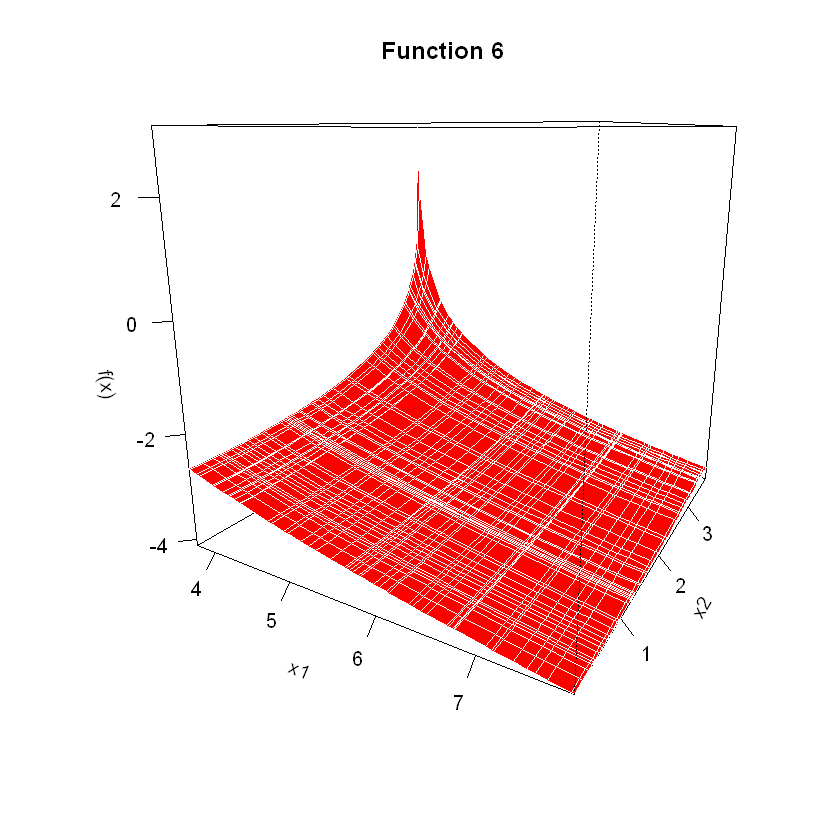

In [88]:
##Generating random matrix with random values for x = [x1,x2]
xrandom1<- matrix(rep(0,100),ncol=2)
xrandom1[,2]<- unique(runif(50,0,4))
m = max(xrandom1[,2])
for (i in seq(1,length(xrandom1[,2])))
{
    xrandom1[i,1] = runif(1,m,8)
}
xrandom1[,1] <- sort(xrandom1[,1],decreasing = FALSE)
xrandom1[,2] <- sort(xrandom1[,2],decreasing = FALSE)
xr1 = rep(xrandom1[,1],length(xrandom1[,1]))
xr2 = c()
for(i in xrandom1[,2]){
list = rep(i,length(xrandom1[,2]))
xr2 = append(xr2,list)
}
xrandom = cbind(xr1,xr2)
funct6 <- function(x){
    mat <- matrix(c(x[1],x[2],x[2],x[1]),byrow = TRUE, ncol =2)
    return ( - (log(det(mat))))
}
fx <- matrix(apply(xrandom,1,funct6),nrow = length(xrandom1[,1]),ncol = length(xrandom1[,2]))
plotfunction(xrandom1[,1],xrandom1[,2],fx,"Function 6",30)

#### This function in convex
<p>&nbsp;</p>

7) $ \sigma(x) = \Large \frac{1}{1 + \,e^{-\lVert x \rVert}} $

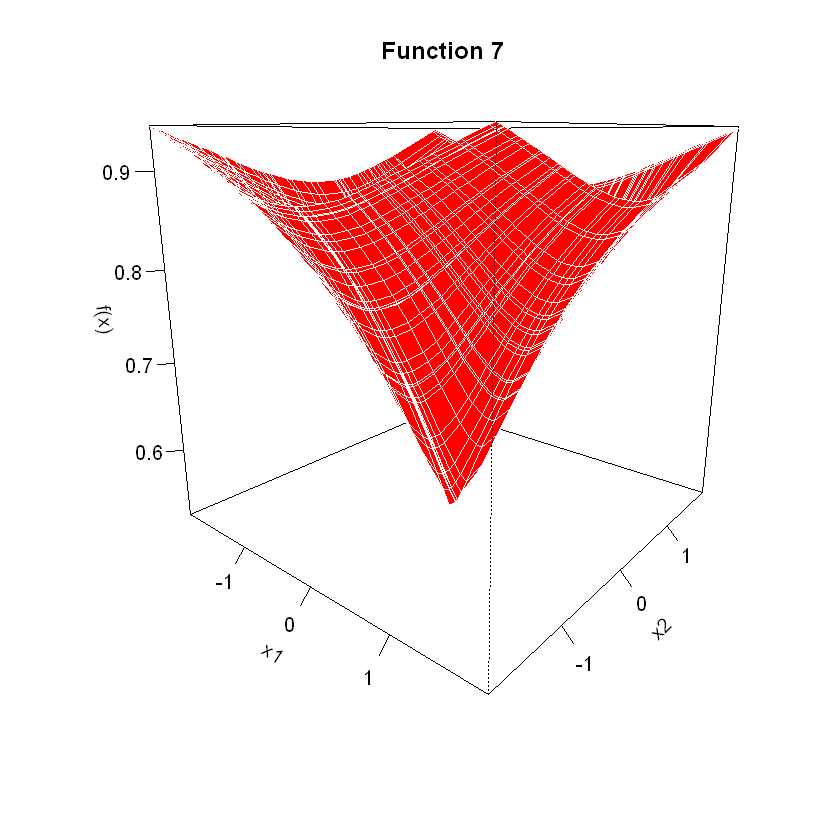

In [137]:
##Generating random matrix with random values for x = [x1,x2]
xrandom1<- matrix(unique(runif(100,-2,2)),ncol=2)
xrandom1[,1] <- sort(xrandom1[,1],decreasing = FALSE)
xrandom1[,2] <- sort(xrandom1[,2],decreasing = FALSE)
xr1 = rep(xrandom1[,1],length(xrandom1[,1]))
xr2 = c()
for(i in xrandom1[,2]){
list = rep(i,length(xrandom1[,2]))
xr2 = append(xr2,list)
}
xrandom = cbind(xr1,xr2)

funct7 <-function(x){
    x <- matrix(x,ncol=2,byrow = TRUE)
    return (1/(1 + exp(-(norm(x, type= "2")))))
}
fx <- matrix(apply(xrandom,1,funct7),nrow = length(xrandom1[,1]),ncol = length(xrandom1[,2]))
plotfunction(xrandom1[,1],xrandom1[,2],fx,"Function 7")

#### This function in stronly convex
<p>&nbsp;</p>

## Question 2 Newton-Raphson Method

### Polynomial in dimension one $f(x) = x^4 - x^3 - 2x^2 + 3x +1, \enspace   x \in \mathbb{R}^2$

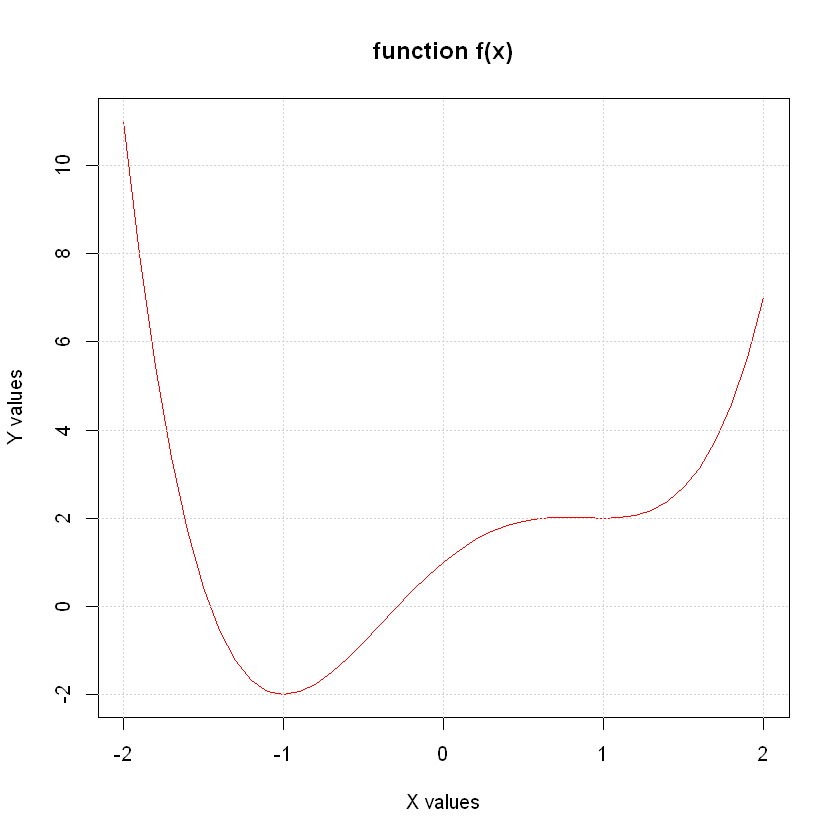

In [1]:
#Function f(x)
polyfunction <- function(x){
    return (x^4 - x^3 - 2*x^2 + 3*x + 1)
}

#Function f'(x)
dervpolyfunction <- function(x){
    return (4*x^3 - 3*x^2 - 4*x + 3)
}

#Function f''(x)
secdervpolyfunction <- function(x){
    return (12*x^2 - 6*x - 4)
}

#x range from -2 and 2
xseq <- seq(-2,2,0.1)

#function value x range from -2 and 2
y <- unlist(lapply(xseq,polyfunction))

#plot function
plot(xseq,y, type = "l", main="function f(x)", col = "red", xlab = "X values", ylab = "Y values", axes = TRUE)
grid()

In [21]:
#Implementation of Newton Raphson method 
newtonRaphson <- function(x) {
    success = FALSE
    trendx = c(x)
    for (i in seq(1,1000)){
        newx = x - dervpolyfunction(x)/secdervpolyfunction(x)
        trendx <- append(trendx,newx)
        #Terminating condition
        if (newx == x) {
            success = TRUE
            break
        }
        x <- newx  
    }
    return (list(success = success, trendx = trendx)) 
}

listtrenx = list()
listsuccess = list()
xvalues <- c( -50,-25,10,-3 ,-2 , 0 ,0.5, 2 , 3, 10,25,50)

#Running newtonRaphson method for various initial points 
for (i in seq(1,length(xvalues)))
    {
    result <- newtonRaphson(xvalues[i])
    listsuccess[[i]] <- result$success
    listtrenx[[i]] <- result$trendx
}

iternation <- lapply(listtrenx,length)
answers <- lapply(listtrenx,function(x) x[length(x)])
iternation <- do.call(cbind, iternation)
answers <- do.call(cbind, answers)
listsuccess <- do.call(cbind, listsuccess)
colnames(iternation)<- xvalues
colnames(answers)<- xvalues
colnames(listsuccess)<- xvalues

print("Number of iteration for each starting points")                  
iternation
print("Success indicator for each starting points")         
listsuccess
print("Optimum value of x as per Newton Raphson method for each starting points")    
answers

[1] "Number of iteration for each starting points"


-50,-25,10,-3,-2,0,0.5,2,3,10,25,50
16,15,15,10,9,3,8,10,12,15,17,19


[1] "Success indicator for each starting points"


-50,-25,10,-3,-2,0,0.5,2,3,10,25,50
TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


[1] "Optimum value of x as per Newton Raphson method for each starting points"


-50,-25,10,-3,-2,0,0.5,2,3,10,25,50
-1,-1,1,-1,-1,0.75,0.75,1,1,1,1,1


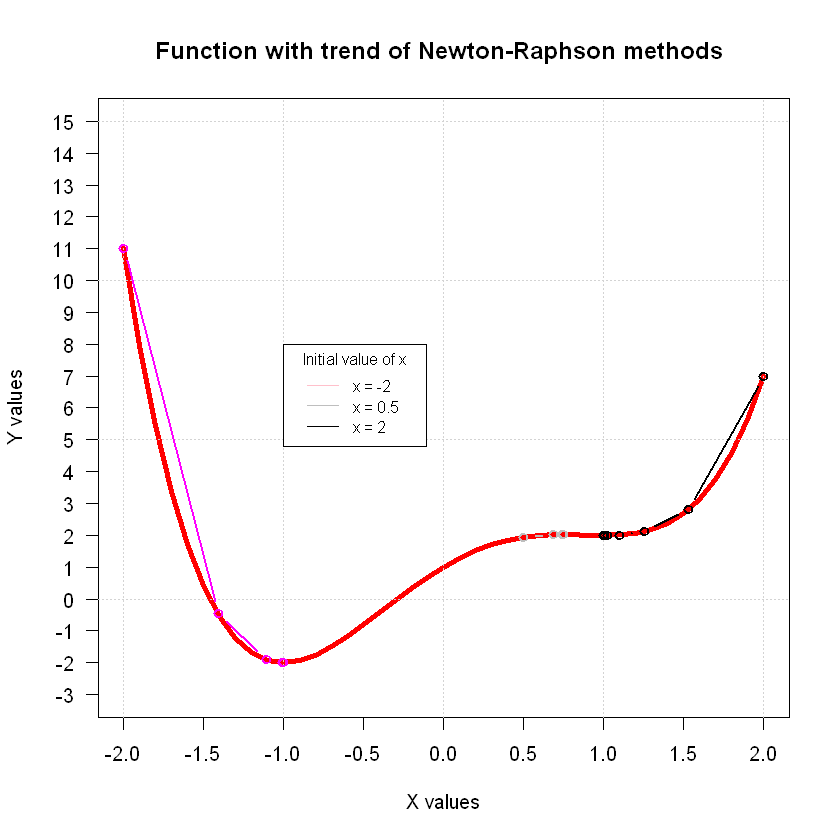

In [23]:
y <- unlist(lapply(xseq,polyfunction))
plot(xseq,y, type = "l", main="Function with trend of Newton-Raphson methods ", col = "red", xlab = "X values", ylab = "Y values", ylim = c(-3,15), lwd = 4,axes = FALSE)
xlabel <- seq(-4, 4, by = 0.5)
ylabel <- seq(-3, 15, by = 1)
axis(1, at = xlabel, las = 1)
axis(2, at = ylabel, las = 1)
box()
grid()
index <- c(5,7,8)
for (i in index)
    {
    yl <- unlist(lapply(listtrenx[[i]],polyfunction))
    lines(listtrenx[[i]],yl,type="b", col = i+1, lwd = 2)
}
legend(-1,8 , legend=c("x = -2", "x = 0.5","x = 2"),title="Initial value of x", 
       col=c("pink", "grey", "black"), lty=1:1, cex=0.8)

Performance algorithm is sensitive to the initialization. When started with different initial points Newton - Raphson may converge in different number of iterations and to different minima (if there is scenario of local and global minima). For example in above case x = -2 converges in 9 iterations, x = 0.5 converges in 8 iterations and x = 2 coverges in 10 iterations. Also for x = -2 algorithm converges with x* = -1 while for  x = 2 algorithm converges with x* = 1 and 0.5 algorithm converges with x* = 0.75.

Newton Raphson method may fail becuase of overshooting. This is the reason that with initial value of $ x \ge 0 $ Newton - Raphson fails to converge at global minima point (x* = -1 ) and converges at local minima x = 0.75 or x = 1. 

For this function I haven't observed an initial point where Newton - Raphson method does not converge at all. 

<p>&nbsp;</p>

## Question 3 Newton's Method on HW1 question

In [168]:
#reading House data
houseData <- read.csv('house.csv')

In [169]:
#creating variable A, y and x 
y <- as.matrix(houseData$price)
A <- as.matrix(houseData[,2:3])
ones = matrix(rep(1,nrow(y)), nrow = nrow(y), ncol = 1)
y <- (y - mean(y))/sd(y)
A[,1] = (A[,1] - mean(A[,1]))/sd(A[,1])
A[,2] = (A[,2] - mean(A[,2]))/sd(A[,2])
A = cbind(ones,A)
x = matrix(rep(0,ncol(A)),nrow =ncol(A), byrow = TRUE) 
colnames(A)[1] <- "intercept"
colnames(y)[1] <- "price"
head(A)
head(y)

intercept,bd,sqft
1,-1.3411019,-0.6753744
1,1.3424687,1.9160003
1,1.3424687,0.7066921
1,0.4479452,0.1433498
1,1.3424687,2.0361800
1,0.4479452,-0.3523915


price
-1.2490641
1.4362784
1.7060115
0.3333699
1.4242903
0.2614411


In [173]:
#delta f(x)
deltafx <- function(x){
    return (-t(A)%*%(y - A%*%x))
    }

#Hessian matrix 
secdeltafx <- t(A)%*%A

In [171]:
# Calculating x* using Newton method 
newx = x - solve(secdeltafx)%*%deltafx(x)

#Using Newton method we find solution just in one iteration 
newx

,price
intercept,1.016019e-16
bd,6.700796e-01
sqft,3.192639e-01


In [172]:
newx <- format(newx, scientific = FALSE)
newx

,price
intercept,0.0000000000000001016019
bd,0.6700795745981675821668
sqft,0.3192638967577376973850


Newton method provided optimal solution just in one iteration as compared to Gradient descent or Stochastic Gradient descent which took multiple iterations. 

<p>&nbsp;</p>

Github link for the code 

https://github.com/jainsanyam786/OptimizationForMachineLearning.git